# Problem set 2 (45 + 50 + 33 + 15 = 143 pts)

## Problem 1 (LU decomposition) 45 pts


### 1. LU  for band matrices and Cholesky decomposition (13 pts)

The complexity to find an LU decomposition of a dense $n\times n$ matrix is $\mathcal{O}(n^3)$.
Significant reduction in complexity can be achieved if the matrix has a certain structure, e.g. it is sparse. 
In the following task we consider an important example of $LU$ for a special type of matrices –– band matrices with top left entry equal to 1 and the bandwidth $m$ equal to 3 or 5 which called tridiagonal and pentadiagonal respectively. The bands may be ```[1, 2, 1]``` and ```[1, 1, 2, 1, 1]``` respectively

- (4 pts) Write a function ```band_lu(diag_broadcast, n)``` which computes LU decomposition for tridiagonal or pentadiagonal matrix with top left entry equal to 1 with given diagonal bands. 
For example, input parametres ```(diag_broadcast = [1,2,1], n = 4)``` mean that we need to find LU decomposition for the triangular matrix of the form:

$$A = \begin{pmatrix}
1 & 1 & 0 & 0\\
1 & 2 & 1 & 0 \\
0 & 1 & 2 & 1 \\
0 & 0 & 1 & 2 \\
\end{pmatrix}.$$

Provide the extensive testing of the implemented function that will works correctly for large $n$,  e.g. $n=100$.
As an output it is considered to make ```L``` and ```U``` - 2D arrays representing diagonals in factors $L$ (```L[0]``` keeps first lower diagonal, ```L[1]``` keeps second lower, ...), and $U$ (```U[:,0]``` keeps main diagonal, ```U[:,1]``` keeps first upper, ...).

- (2 pts) Compare execution time of the band LU decomposition using standard function from ```scipy```, i.e. which takes the whole matrix and does not know about its special structure, and band decomposition of yours implementation. Comment on the results.

- (7 pts) Write a function ```cholesky(n)``` for computing Cholesky decomposition. It should take the the single argument - the matrix that will be factorized and return the single output - lower-triangular factor $L$. Think about the efficiency of your implementation and if necessary update it to achieve the best performance (eliminate Python loops, where it is possible and so on). Explicitly describe the difference with LU decomposition that reduces the complexity from $2n^3/3$ for LU to $n^3/3$ for Cholesky. 
Test the implemented function on the Pascal matrix of given size $n$ for $n = 5, 10, 50$. 
Pascal matrix is square matrix of the following form (here for $n=4$)
$$P = \begin{pmatrix}
1 & 1 & 1 & 1\\
1 & 2 & 3 & 4 \\
1 & 3 & 6 & 10 \\
1 & 4 & 10 & 20 \\
\end{pmatrix}.$$

    [Here](https://en.wikipedia.org/wiki/Pascal_matrix) you can find more details about such matrices and analytical form for factor $L$ from Cholesky decomposition. Compare the result of your implementation with analytical expression in terms of some matrix norm of difference.  

In [1]:
from scipy.sparse import diags # can be used with broadcasting of scalars if desired dimensions are large
import numpy as np
import copy

# INPUT : diag_broadcast - list of diagonals value to broadcast,length equal to 3 or 5; n - integer, band matrix shape.
# OUTPUT : L - 2D np.ndarray, L.shape[0] depends on bandwidth, L.shape[1] = n-1, do not store main diagonal, where all ones;                  add zeros to the right side of rows to handle with changing length of diagonals.
#          U - 2D np.ndarray, U.shape[0] = n, U.shape[1] depends on bandwidth;
#              add zeros to the bottom of columns to handle with changing length of diagonals.
def band_lu(diag_broadcast, n):
    if len(diag_broadcast) == 3:
        L = np.zeros(shape=(1,n-1))
        U = np.zeros(shape=(n,2))
        for i in range(n):
            if i != 0:
                L[0,i - 1] = diag_broadcast[0] / U[i - 1,0]
                U[i,0] = diag_broadcast[1] - L[0,i - 1] * diag_broadcast[2]
                U[i - 1,1] = diag_broadcast[2]
            else:
                U[i,0] = 1#diag_broadcast[1]
    else:# len(diag_broadcast) == 3:
        L = np.zeros(shape=(2,n-1))
        U = np.zeros(shape=(n,3))
        for i in range(n):
            if i == 0:
                U[i,0] = 1
                U[i,1] = diag_broadcast[3]
                U[i,2] = diag_broadcast[4]
            elif i==1:
                U[i,2] = diag_broadcast[4]
                L[0,i - 1] = diag_broadcast[1] / U[i - 1,0]
                U[i,0] = diag_broadcast[2] - L[0,i - 1] * U[i - 1,1]
                U[i,1] = diag_broadcast[3] - U[i - 1,2] * L[0,i - 1]
            else:
                U[i,2] = diag_broadcast[4]#epsilon
                L[1,i - 2] = diag_broadcast[0] / U[i - 2,0]#alpha
                L[0,i - 1] = (diag_broadcast[1] - U[i - 2,1] * L[1,i - 2]) / U[i - 1,0]#beta
                U[i,0] = diag_broadcast[2] - L[1,i - 2] * U[i - 2,2] - L[0,i - 1] * U[i - 1,1]#gamma
                U[i,1] = diag_broadcast[3] - U[i - 1,2] * L[0,i - 1]#delta
                if i==3:
                    print()
    return L, U
                    
    raise NotImplementedError()
    
def cholesky(A):
    n = A.shape[0]
    C = A.copy()
    L = np.eye(n)
    for i in range(n-1):
#         print(C)
        a_i = copy.deepcopy(C[i,i])
        b_i = C[i+1:, i].copy()
        B_i = C[i+1:,i+1:].copy()
#         print(f"i = {i}, a_ = {a_i}, b_i = {b_i}, B_i = {B_i}, C = {C}")
        L_i = np.eye(n)
        L_i[i,i] = np.sqrt(a_i)
        L_i[i+1:, i] = b_i / np.sqrt(a_i)
#         print(f"i = {i}, a_ = {a_i}")
        C[i,i] = 1
        C[i+1:, i] = 0
        C[i, i+1:] = 0
        D = B_i - b_i.reshape((n-i-1,1)).dot(b_i.reshape((n-i-1,1)).T) / a_i
        C[i+1:,i+1:] = (B_i - b_i.reshape((n-i-1,1))@b_i.reshape((n-i-1,1)).T / a_i)
        L = L@L_i
#     print(f"i = {i}, a_ = {a_i}, b_i = {b_i}, B_i = {B_i}, C = {C}")
    L_i = np.eye(n)
    L[i+1,i+1] = np.sqrt(C[n-1,n-1])
    L = L@L_i
    return L
#     raise NotImplementedError()

In [2]:
# Your solution is here
import timeit
from scipy.linalg import lu
import matplotlib.pyplot as plt
%matplotlib inline

def LU_check(diag_broadcast = [1,2,1], n = 7):
    if len(diag_broadcast) == 3:
        l,u = band_lu(diag_broadcast = diag_broadcast, n = n)
        x1 = np.eye(n)
        x2 = np.diagflat(l[0,:],k=-1)
        x3 = np.diagflat(u[:,0],k=0)
        x4 = np.diagflat(u[:-1,1],k=1)
        L_my = x1 + x2
        U_my = x3 + x4
        x1 = np.eye(n) * diag_broadcast[1]
        x2 = np.diagflat(np.ones(n-1) * diag_broadcast[0],k=-1)
        x3 = np.diagflat(np.ones(n-1) * diag_broadcast[2],k=1)
        A = x1 + x2 + x3
        A[0,0] = 1
        return np.linalg.norm(A - L_my@U_my)
    elif len(diag_broadcast) == 5:
        l,u = band_lu(diag_broadcast = [1,1,20,1,1], n = n)
        l,u, np.eye(n)
        x1 = np.eye(n)
        x2 = np.diagflat(l[0,:],k=-1)
        x3 = np.diagflat(l[1,:-1],k=-2)
        x4 = np.diagflat(u[:,0],k=0)
        x5 = np.diagflat(u[:-1,1],k=1)
        x6 = np.diagflat(u[:-2,2],k=2)
        L_my = x1 + x2 +x3
        U_my = x4 + x5 + x6
        x1 = np.eye(n) * diag_broadcast[2]
        x2 = np.diagflat(np.ones(n-1) * diag_broadcast[1],k=-1)
        x3 = np.diagflat(np.ones(n-1) * diag_broadcast[3],k=1)
        x4 = np.diagflat(np.ones(n-2) * diag_broadcast[0],k=-2)
        x5 = np.diagflat(np.ones(n-2) * diag_broadcast[4],k=2)
        A = x1 + x2 + x3 + x4 + x5
        A[0,0] = 1
        return np.linalg.norm(A - L_my@U_my)
    else:
        print('diag_broadcast must have len 3 or 5')
        
n = 1000
LU_check(diag_broadcast = [1,10,1], n = n)

0.0

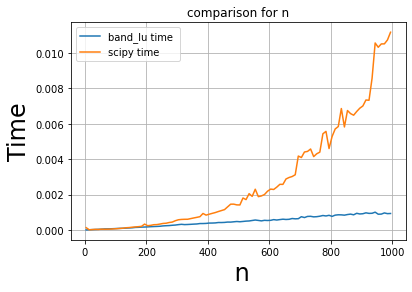

In [3]:
n = 7
diag_broadcast = [1,9,2]
ns = np.array(range(4,1000,10))
number = 100
times_my = np.zeros(len(ns))
times_scipy = np.zeros(len(ns))
if len(diag_broadcast) == 3:
    for i in range(len(ns)):
        n = ns[i]
        diagonals = [np.ones(n) * diag_broadcast[1], np.ones(n-1) * diag_broadcast[0], np.ones(n-1) * diag_broadcast[2]]
        A = diags(diagonals, [0,-1,1])
        A = A.toarray()
        A[0,0] = 1
        A = np.array(A)
# #             p,l,u = lu(A)
# # #             print(A)
#             mysetup = '''
#             diagonals = [np.ones(n) * diag_broadcast[1], np.ones(n-1) * diag_broadcast[0], np.ones(n-1) * diag_broadcast[2]]
#             A = diags(diagonals, [0,-1,1])
#             A = A.toarray()
#             A[0,0] = 1
#             A = np.array(A)
#             '''
#             mycode = '''
#             lu(A)
#             '''
        times_my[i] = timeit.timeit(stmt = 'band_lu(diag_broadcast = diag_broadcast, n = n)', number = number, globals=globals()) / number
        times_scipy[i] = timeit.timeit(stmt = 'lu(A)', number = number, globals=globals()) / number
        
plt.plot(ns, times_my, ns, times_scipy)
# plt.plot(ns, time_n_jax)
plt.title('comparison for n')
plt.ylabel(r"Time", fontsize=24)
plt.xlabel(r" n", fontsize=24)
plt.legend(['band_lu time ', 'scipy time'])
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

It can be seen that a manual implementation that takes into account the matrix structure is much more efficient for large n

In [289]:
def generate_pascal(n):
    A = np.zeros((n,n))
    row = [1]
    for i in range(n):
        A[i,:i+1] = np.array(row)
        row = [sum(x) for x in zip([0]+row, row+[0])]
    return A@A.T

def generate_pascal_better(rows):
    row = [1]
    for i in range(rows):
        print(row)
        row = [sum(x) for x in zip([0]+row, row+[0])]


# n = 4
# A = generate_pascal(n)
# cholesky(A)
times = [0,0,0]
number = 5
i = 0
for n in [4,10,29]:
    A = generate_pascal(n)
    times[i] = timeit.timeit(stmt = 'cholesky(A)', number = number, globals=globals()) / number
    i += 1
times

[0.0002510157995857298, 0.0003922601987142116, 0.0007510658004321157]

In [325]:
import scipy
import torch
n = 4

A = scipy.linalg.pascal(n)# + np.eye(n)*1e10
l = scipy.linalg.cholesky(np.array(A)).T
# l = cholesky(np.array(A))

np.linalg.norm(l@l.T - A)
# l
# print(l)

0.0

The reason for the failure is the very rapid growth in the size of the coefficients of the Pascal matrix. At n=50, its values simply do not fit into python numeric types. Because of this, errors occur and some minors are defined as negative. This is a problem of both my implementation and the library

# Finish with holesky. Especially complexity

### 2. Stability of LU (8 pts)

* (4 pts) Show, that for these  matrices $A$ and $B$ LU decomposition fails. Why does it happen?



$
A = \begin{pmatrix}
0 & 1 \\
2 & 3
\end{pmatrix}.$ 

$B = \begin{pmatrix}
1 & 1 & 0\\
1 & 1 & 2 \\
1 & 2 & 1
\end{pmatrix}.$ 

* (4 pts) In the LU decomposition, a pivot position is a position of the element that identifies the row and column that will be eliminated in the current step. For example, first pivot in LU is usually the left top element. What value of $c$ leads to zero in the second pivot position? What $c$ produces zero in the third pivot position? What modification of LU should we use in order to address the possible zeros in pivot position?

$A = \begin{pmatrix}
1 & c & 0\\
2 & 4 & 1 \\
3 & 5 & 1
\end{pmatrix}.$ 

Suppose that LU decomposition exists:
$$
A = \begin{pmatrix}
0 & 1 \\
2 & 3
\end{pmatrix} = \begin{pmatrix}
1 & 0 \\
\alpha_2 & 1
\end{pmatrix} \cdot \begin{pmatrix}
\beta_1 & \gamma_1 \\
0 & \beta_2
\end{pmatrix} = \begin{pmatrix}
\beta_1 & \gamma_1 \\
\beta_1 \alpha_2 & \gamma_1 \alpha_2 + \beta_2
\end{pmatrix} \Rightarrow
$$

$$
\begin{cases}
\beta_1 = 0 \\
\beta_1 \alpha_2 = 2
\end{cases} \Rightarrow \text{controversy}
$$

$$
B = \begin{pmatrix}
1 & 1 & 0\\
1 & 1 & 2 \\
1 & 2 & 1
\end{pmatrix} = \begin{pmatrix}
1 & 0 & 0\\
\alpha_2 & 1 & 0 \\
\beta_3 & \alpha_3 & 1
\end{pmatrix} \cdot \begin{pmatrix}
\gamma_1 & \delta_1 & \varepsilon_1\\
0 & \gamma_2 & \delta_2 \\
0 & 0 & \gamma_3
\end{pmatrix} \Rightarrow
$$

$$
\begin{cases}
\gamma_1 = 1 \\
\delta_1 = 1\\
\alpha_2 = \frac{1}{\gamma_1} = 1 \\
\delta_1 \alpha_2 + \gamma_2 = 1 \Rightarrow \gamma_2 = 1 - \delta_1 \alpha_1 = 0 \\
\beta_3 = \frac{1}{\gamma_1} = 1 \\
\delta_1 \beta_3 + \gamma_2 \alpha_3 = 2 \Rightarrow \beta_3 = 2 
\end{cases} \Rightarrow \text{controversy}
$$

We just was unluky with order of strings so some of leading principal minors were zeroes.

2. Let's start calculating LU:
$$
A = \begin{pmatrix}
1 & c & 0\\
2 & 4 & 1 \\
3 & 5 & 1
\end{pmatrix}.
$$ 

$$
L_i = \begin{pmatrix}
1 & 0 & 0\\
-2 & 1 & 0 \\
-3 & 0 & 1
\end{pmatrix}. L = \begin{pmatrix}
1 & 0 & 0\\
2 & 1 & 0 \\
3 & 0 & 1
\end{pmatrix}. A = \begin{pmatrix}
1 & 0 & 0\\
-2 & 1 & 0 \\
-3 & 0 & 1
\end{pmatrix} \cdot \begin{pmatrix}
1 & c & 0\\
2 & 4 & 1 \\
3 & 5 & 1
\end{pmatrix} = \begin{pmatrix}
1 & c & 0\\
0 & 4-2c & 1 \\
0 & 5-3c & 1
\end{pmatrix}
$$ 

$$
L_i = \begin{pmatrix}
1 & 0 & 0\\
0 & 1 & 0 \\
0 & \frac{3c-5}{4-2с} & 1
\end{pmatrix}. L = \begin{pmatrix}
1 & 0 & 0\\
2 & 1 & 0 \\
3 & \frac{5-3с}{4-2с} & 1
\end{pmatrix}. A = \begin{pmatrix}
1 & 0 & 0\\
0 & 1 & 0 \\
0 & \frac{3c-5}{4-2с} & 1
\end{pmatrix} \cdot \begin{pmatrix}
1 & c & 0\\
0 & 4-2c & 1 \\
0 & 5-3c & 1
\end{pmatrix} = \begin{pmatrix}
1 & c & 0\\
0 & 4-2c & 1 \\
0 & 0 & \frac{c-1}{4-2c}
\end{pmatrix} \Rightarrow \text{c for zeroing second pivot pos is 2, for third is 1}
$$ 
The same results can be achieved via main minor calculating. We can fix our problem by using simple PLU-algorithm. Except when c=1 which leads to the singularity of the matrix

### 3. Implementation of PLU decomposition (14 pts)

As you have noticed before, LU decomposition may fail. In order to make it stable, we can use LU decomposition with pivoting  (PLU).

We want to find such permutation matrix $P$ that LU decomposition of $PA$ exists

$$ PA = LU $$

- (7 pts) Implement efficiently PLU decomposition (without loops and with appropriate level of BLAS operations).  Also, pay attention to the way of permutation matrix storage.

- (4 pts ) Compare your function for computing PLU with built-in function on matrices of such type ```(mirror_diag = [1,2,1], n = 4)```. (Bandwidth and matrix size may vary). So, you can pass them as dense 2D NumPy array and do not tune your implementation to this special structure. Compare them in terms of running time (use ```%timeit``` magic) for range of dimensions to recover the asymptotic rate of time increasing and in terms of acuracy. We expect you plot the running time vs matrix dimension for built-in function and your implementation. So you should get the plot with two lines.
Consider additionally one of the pathological examples from above, where LU fails, but PLU has to work.


$$A = \begin{pmatrix}
0 & 0 & 1 & 1 \\
 0 &1 & 2 & 1  \\
 1 & 2 & 1  & 0\\
1 & 2  & 0 & 0  \\
\end{pmatrix}.$$


- (3 pts) Discuss the obtained results and explain how is it possible to accelerate computing the PLU factorization. 

NumPy or JAX are both ok in this problem, but please use the single library for all implementations. 

In [10]:
def lu_decomposition(A):
    """Performs an LU Decomposition of A (which must be square)                                                                                                                                                                                        
    The function returns P, L and U."""
    n = A.shape[0]                                             
    PA = A.copy()
    piv = np.arange(0,n)
    P = np.eye(n)
    
    L = np.eye(n)
    for i in range(n):
        if PA[i,i] == 0:
            max_row_index = np.argmax(abs(PA[i:n,i])) + i    
            piv[[i,max_row_index]] = piv[[max_row_index,i]]#effective way to sorage Permutation matrix     
            PA[[i,max_row_index]] = PA[[max_row_index,i]]
#             P[[max_row_index,i]] = P[[i,max_row_index]]
            P[[i,max_row_index]] = P[[max_row_index,i]]
        Li = np.eye(n)
        Li[i+1:, i] = - PA[i+1:, i] / PA[i,i]
        L[i+1:, i] = - Li[i+1:, i]
        PA = Li@PA
    return P, L, PA

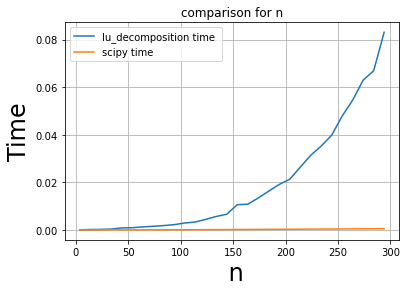

In [11]:
A = np.array([ [1, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
n = 7
diag_broadcast = [1,9,2]
ns = np.array(range(4,300,10))
number = 100
times_my = np.zeros(len(ns))
times_scipy = np.zeros(len(ns))
if len(diag_broadcast) == 3:
    for i in range(len(ns)):
        n = ns[i]
        diagonals = [np.ones(n) * diag_broadcast[1], np.ones(n-1) * diag_broadcast[0], np.ones(n-1) * diag_broadcast[2]]
        A = diags(diagonals, [0,-1,1])
        A = A.toarray()
        A[0,0] = 1
        A = np.array(A)
        times_my[i] = timeit.timeit(stmt = 'lu_decomposition(A)', number = number, globals=globals()) / number
        times_scipy[i] = timeit.timeit(stmt = 'lu(A)', number = number, globals=globals()) / number
        
plt.plot(ns, times_my, ns, times_scipy)
# plt.plot(ns, time_n_jax)
plt.title('comparison for n')
plt.ylabel(r"Time", fontsize=24)
plt.xlabel(r" n", fontsize=24)
plt.legend(['lu_decomposition time ', 'scipy time'])
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Most likely, to improve your own PLU implementation, you just need to rewrite it in a faster language, such as C. It is also possible that a block implementation will help

In [12]:
# A = np.array([ [1, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
A = np.array([ [0, 0, 1, 1], [0, 1, 2, 1], [1, 2, 1, 0], [1, 2, 0, 0] ])
P,L,U = lu_decomposition(A)
print(P@L@U - A)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### 4. Block LU (10 pts)

Let $A = \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix}$ be a block matrix. The goal is to solve the linear system

$$
     \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}.
$$

* (2 pts) Using block elimination find matrix $S$ and right-hand side $\hat{f_2}$ so that $u_2$ can be found from $S u_2 = \hat{f_2}$. Note that the matrix $S$ is called <span style="color:red">Schur complement</span> of the block $A_{11}$.
* (4 pts) Using Schur complement properties prove that 

$$\det(X+AB) = \det(X)\det(I+BX^{-1}A), $$


where $X$ - nonsingular square matrix.
* (4 pts) Let matrix $F \in \mathbb{R}^{m \times n}$ and $G \in \mathbb{R}^{n \times m}$. Prove that 

$$\det(I_m - FG) = \det(I_n - GF).$$

1. 
\begin{equation*}
\begin{cases}
A_{11}u_1 = f_1 - A_{12}u_2 \\
A_{22}u_2 = f_2 - A_{21}u_1 
\end{cases}
\Rightarrow  \\
\end{equation*}
$$
u_2 = A_{22}^{-1}\left( f_2 - A_{21}u_1 \right) \Rightarrow A_{11}u_1 =
f_1 - A_{12}A_{22}^{-1}f_2 - A_{12}A_{22}^{-1}A_{21}u_1 \Rightarrow
$$

$$
\underbrace{\left( A_{11} + A_{12}A_{22}^{-1}A_{21} \right)}_{S} u_1 = \underbrace{\left( f_1 - A_{12}A_{22}^{-1}f_2 \right)}_{\hat{f}_2} \Rightarrow 
\begin{cases}
S = A_{11} + A_{12}A_{22}^{-1}A_{21} \\
\hat{f}_2 = f_1 - A_{12}A_{22}^{-1}f_2 
\end{cases}
$$
<!-- 2. We know(easy to check) that for nonsingular matrix: 
$$
\begin{bmatrix}
a_{11} & a_{12} \\ 
a_{21} & a_{22} 
\end{bmatrix} = 
\begin{bmatrix}
1 & 0 \\ 
l_{21} & 1 
\end{bmatrix} \begin{bmatrix}
d_{11} & 0 \\ 
0 & d_{22} 
\end{bmatrix} \begin{bmatrix}
1 & u_{12} \\ 
0 & 1 
\end{bmatrix}
$$
where
$$
l_{21}= \frac{a_{21}}{a_{11}}\text{, }d_{11} = a_{11}, d_{22} = \frac{a_{11}a_{22} - a_{12}a_{21}}{a_{11}}\text{, }u_{12} = \frac{a_{12}a_{11}}{a_{11}a_{22} - a_{12}a_{21}}
$$ -->
2. One of the Schur complement properties:if matrix A is nonsingular and
$$
M = \begin{bmatrix}
A & B \\
C & D
\end{bmatrix}
$$
then $\det(M) = \det(A)\det(D - CA^{-1}B)$. Now we can now consider matrix 
$$
M = \begin{bmatrix}
X & -A \\
B & I
\end{bmatrix}
$$
then $det(M) = \det(X + AB) = \det(I + BX^{-1}A)$  
Notice: 
$$
\det\left( \begin{bmatrix}
X & -A \\
B & I
\end{bmatrix} \right) = \det\left( \begin{bmatrix}
X+AB & 0 \\
B & I
\end{bmatrix} \right) = \text{well known theorem} = \det(X + AB) \cdot \det(I)
$$
3. Using previous propertie of Schur complement and considering matrix
$$
\begin{bmatrix}
I_m & F \\
G & I_n
\end{bmatrix}
$$
$\det(M) = det(I_m) \cdot \det(I_n - GF) = det(I_n) \cdot \det(I_m - FG)$ 


## Problem 2 (eigenvalues)  (50 pts)

### 1. Theoretical tasks (15 pts)

* (2 pts) Prove that eigenvectors that correspond to distinct eigenvalues are linearly independent.

* (3 pts) $A$ is a matrix such that $a_{i,j} \ge 0$ and $\sum_{j}a_{i,j} = 1$ (sum of the elements in each row is 1). Prove that $A$ has an eigenvalue $\lambda=1$ and that any eigenvalue $\lambda_i$: $|\lambda_i| \le 1$.

* (5 pts) Prove that normal matrix is Hermitian iff its eigenvalues are real. Prove that normal matrix is unitary iff its eigenvalues satisfy $|\lambda| = 1$. 

* (5 pts) The following problem illustrates instability of the Jordan form. Find theoretically the eigenvalues of the perturbed Jordan block (there is only one $\varepsilon$ - in the left lower corner):

$$
    J(\varepsilon) = 
    \begin{bmatrix} 
     \lambda & 1 & & & 0 \\ 
     0 & \lambda & 1 & & \\ 
     & 0 & \ddots & \ddots & \\ 
     & & 0 & \lambda & 1 \\ 
     \varepsilon & & & 0 & \lambda  \\ 
    \end{bmatrix}_{n\times n}
$$

   Comment how eigenvalues of $J(0)$ are perturbed for large $n$.

1. Suppose the opposite: exists $k+1$ eigenvectors $x, y_1, \ldots, y_k $ that correspond to distinct eigenvalues and $ \alpha_1, \ldots, \alpha_k \neq 0$ such that $x = \sum\limits_{i=1}^k \alpha_i y_i$. For simplicity suppose that $\lambda_x \neq 0$. Apply operator $A \Rightarrow$
$\lambda_x x = \sum\limits_{i=1}^k \alpha_i \lambda_{y_i} y_i \Rightarrow x = \sum\limits_{i=1}^k \alpha_i \frac{\lambda_{y_i}}{\lambda_x} y_i \Rightarrow$  
$0 = x - x = \sum\limits_{i=1}^k \alpha_i \left(\frac{\lambda_{y_i}}{\lambda_x} - 1\right) y_i$. But $\forall i \text{: }\frac{\lambda_{y_i}}{\lambda_x} \neq 1 \Rightarrow y_1 = \sum\limits_{i=2}^k \alpha^{'}_i y_i$ where $\alpha_j^{'} \neq 0 \text{for }j = \overline{2,k}$. Repeat our procedure $ k-2 $ times $\ldots y_{k-1} = \alpha_k^{''}y_{k}$. Apply operator A $\Rightarrow$ $0 = y_{k-1} - y_{k-1} =\underbrace{\alpha_k^{''} \left( \frac{\lambda_{y_{k}}}{\lambda_{y_{k-1}}} - 1 \right)}_{\neq 0} y_k \Rightarrow y_k = 0$ - controversy(eigenvector must be nonzero).  
Note: Situation when one of eigval is zero is not scary. In our algorithm we only should initially enumerate $x, y_1, \ldots, y_k $ in such a way that $y_k$ will coresspond to $\lambda_{y_k} = 0$




2.  
$$
A \begin{bmatrix}
1 \\
1 \\
\vdots \\
1
\end{bmatrix} = \begin{bmatrix}
\sum\limits_{j=1}^na_{1,j} \\
\sum\limits_{j=1}^na_{2,j} \\
\vdots \\
\sum\limits_{j=1}^na_{n,j}
\end{bmatrix} = \begin{bmatrix}
1 \\
1 \\
\vdots \\
1
\end{bmatrix} \Rightarrow
$$
vector of ones is eigenvector of $A$ with eigenvalue 1. Consider some eigenvector $x = (x_1, \ldots, x_n)^T$. Suppose $x_{max} = \max\limits_{i = 1 \ldots n}|x_i|$ and $i_{max}$ - number of this element.  
We know that $|(Ax)_{i_{max}}| = |\lambda x_{i_{max}}| = |\lambda| x_{max}$ and $|(Ax)_{i_{max}}| \leq \sum\limits_{j=1}^n|a_{i_{max},j}||x_j| \leq x_{max} \sum\limits_{j=1}^n|a_{i_{max},j}| =\left\{ \text{since } a_{ij} \geq 0 \right\}= x_{max} \sum\limits_{j=1}^na_{i_{max},j} = 1 \cdot x_{max} \Rightarrow |\lambda| \leq 1$ 

3. Prove that normal matrix is Hermitian iff its eigenvalues are real:
We will use important fact from lecture that normal matrix is diagonalizable. So $A = UDU^{*}$, where $D$ is diagonal, $U$ is unitary.
3.1 
$\Rightarrow$: Normal matrix is hermitian, so $ UDU^* = A = \text{since hermitian}=A^* = UD^*U^* \Rightarrow UDU^* = UD^*U^* \Rightarrow \text{unitary matrix is nonsingular, so we can multiply} \Rightarrow D = D^*$. That's mean that $D$ is real diag matrix(not complex) $\Rightarrow$ eigenvectors of $A$ are real.   
$\Leftarrow$: $A^* = (UDU^*)^* = UD^*U^* = \text{since } D\text{ is real matrix} = UDU^* = A$  
3.2 Prove that normal matrix is unitary iff its eigenvalues satisfy $|\lambda|=1$  
$\Rightarrow$ Normal matrix is unitary, so: $AA^* = UDU^*(UDU^*)^* = UDU^*UD^*U^* = U\text{ is unitary} = UDD^*U^*$. We know(proof by direct multiplication) that diag$(d^{'}_1,\ldots,d^{'}_n)\cdot$diag$(d^{''}_1,\ldots,d^{''}_n) = $diag$(d^{'}_1\cdot d^{''}_1,\ldots,d^{'}_n \cdot d^{''}_n)$ and for any complex number $a$: $a\overline{a} = |a|^2 \Rightarrow $ diag$(d_1,\ldots,d_n)\cdot$$\text{diag}(d_1,\ldots,d_n)^* = \text{diag}(|d_1|^2,\ldots,|d_n|^2)$. So $DD^* = F = \text{diag}(|\lambda_1|^2,\ldots,|\lambda_n|^2)$ where $\lambda_i$ is eigenvalue of $A$. Now we can continue: $AA^* = UFU^*$ and $AA^* = I = UIU^* \Rightarrow F = I$. That's what we wanted.  
$\Leftarrow$: Now we know that $F = I$ and want to check $AA^*=I$. $AA^* = = UDU^*(UDU^*)^* = UDU^*UD^*U^* = U\text{ is unitary} = UDD^*U^* = UFU^* = UU^* = I$. $A^*A=I$ - proof the same.


4.  Find theoretically the eigenvalues of the perturbed Jordan block (there is only one $\varepsilon$ - in the left lower corner):

$$
    J(\varepsilon) = 
    \begin{bmatrix} 
     \lambda & 1 & & & 0 \\ 
     0 & \lambda & 1 & & \\ 
     & 0 & \ddots & \ddots & \\ 
     & & 0 & \lambda & 1 \\ 
     \varepsilon & & & 0 & \lambda  \\ 
    \end{bmatrix}_{n\times n}
$$

   Comment how eigenvalues of $J(0)$ are perturbed for large $n$.  
Let's find $\det(J(\varepsilon) - \mu I)$. We'll use the decomposition by the first column:
$$
    \det(J(\varepsilon) - \mu I) = 
    \det\left(\begin{bmatrix} 
     \lambda - \mu & 1 & & & 0 \\ 
     0 & \lambda - \mu & 1 & & \\ 
     & 0 & \ddots & \ddots & \\ 
     & & 0 & \lambda - \mu & 1 \\ 
     \varepsilon & & & 0 & \lambda - \mu \\ 
    \end{bmatrix}\right) = 
    (-1)^{n+1}\varepsilon\det(I) + (\lambda - \mu) \det\left( \begin{bmatrix} 
     \lambda - \mu & 1 & & & 0 \\ 
     0 & \lambda - \mu & 1 & & \\ 
     & 0 & \ddots & \ddots & \\ 
     & & 0 & \lambda - \mu & 1 \\ 
     0 & & & 0 & \lambda - \mu \\ 
    \end{bmatrix}_{n-1 \times n - 1} \right)
$$
$\Rightarrow (-1)^{n+1}\varepsilon + (\lambda - \mu)^n = 0 \Rightarrow \lambda - \mu = ((-1)^{n+1})^{\frac{1}{n}} \varepsilon^{\frac{1}{n}}$. Split into two simple cases:  
n is not even: $\mu = \lambda -  (1)^{\frac{1}{n}} \varepsilon^{\frac{1}{n}}$ - $n$ complex numbers on a circle with center $\lambda$ and radius $\varepsilon^{\frac{1}{n}}$ ($\mu_{k} = \lambda - \varepsilon^{\frac{1}{n}} \cdot e^{i \frac{2 \pi k}{n}}\text{, }k=0,1,\ldots, n-1 $)  
n is even: $\mu = \lambda -  (-1)^{\frac{1}{n}} \varepsilon^{\frac{1}{n}}$ - $n$ complex numbers on a circle with center $\lambda$ and radius $\varepsilon^{\frac{1}{n}}$ ($\mu_{k} = \lambda - \varepsilon^{\frac{1}{n}} \cdot e^{i \frac{\pi k}{n}}\text{, }k=1,3,\ldots, 2n-1$)

Thus, for any arbitrarily small $\varepsilon$, it is possible to pick up such a large n that the eigenvalues of the perturbed Jordan block will differ from the correct one by almost one (by a vector of almost length 1 on the complex plane). This illustrates the instability of the Jordan form.

### 2. PageRank (35 pts)


#### Damping factor importance

* (5 pts) Write the function ```pagerank_matrix(G)``` that takes an adjacency matrix $G$ (in both sparse and dense formats) as an input and outputs the corresponding PageRank matrix $A$.

In [16]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
# INPUT:  G - np.ndarray or sparse matrix
# OUTPUT: A - np.ndarray (of size G.shape) or sparse matrix
def pagerank_matrix(G):
    if type(G) is np.ndarray:
        return G  / G.sum(axis=0)
    return G.multiply(1 / G.sum(axis=0))


A = np.array([[1,1, 1], [1, 0,0], [1, 1, 0]])
# print(type(A))
# if type(A) is np.ndarray:
#     print('this way')
pagerank_matrix(A)

array([[0.33333333, 0.5       , 1.        ],
       [0.33333333, 0.        , 0.        ],
       [0.33333333, 0.5       , 0.        ]])

* (3 pts) Find PageRank matrix $A$ that corresponds to the following graph: <img src="graph.png" width='250'>
What is its largest eigenvalue? What multiplicity does it have?


* (5 pts) Implement the power method for a given matrix $A$, an initial guess $x_0$ and a number of iterations ```num_iter```. It should be organized as a function ```power_method(A, x0, num_iter)``` that outputs approximation to eigenvector $x$, eigenvalue $\lambda$ and history of residuals $\{\|Ax_k - \lambda_k x_k\|_2\}$. Make sure that the method converges to the correct solution on a matrix $\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}$ which is known to have the largest eigenvalue equal to $3$.

### Find PageRank matrix 𝐴 that corresponds to the following graph:

In [150]:
G = np.array([[0,0,1,0,0], [1,0,1,0,0], [0,1,0,0,0], [0,0,0,0,1],[0,0,0,1,0]]) #adjacency matrix
# print(G)
A = pagerank_matrix(G)#our PageRank matrix 𝐴
print(A)
print(np.linalg.eig(A)[0])

[[0.  0.  0.5 0.  0. ]
 [1.  0.  0.5 0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  1. ]
 [0.  0.  0.  1.  0. ]]
[-0.5+0.5j -0.5-0.5j  1. +0.j   1. +0.j  -1. +0.j ]


$$
A = \begin{bmatrix} 
     0 & 0 & 1/2 & 0 & 0 \\ 
     1 & 0 & 1/2 & 0 & 0 \\ 
     0 & 1 & 0 & 0 & 0 \\ 
     0 & 0 & 0 & 0 & 1 \\ 
     0 & 0 & 0 & 1 & 0 
    \end{bmatrix}
$$ This matrix is left stochastic, so it's simpler to work with $A^T$(left vector multiplication) which has same eigvalues. Since graph has two graph connectivity componenеs $\Rightarrow$ it's matrix has following block form:
$$
\begin{bmatrix} 
C & 0 \\ 
0 & D 
\end{bmatrix}
$$
So, we can find two different eigenvectors corresponds to eigenvalue one: $x_1 = (c,c,c,0,0)$ and $x_2 = (0,0,0,b,b)$: $x_1A = x_1$, $x_2A = x_2$. And it's eigenvalue -1: $(A(0,0,0,1,-1)^T =-(0,0,0,-1,1) )$ It will be important in next problem since $|1|=|-1|$ . Also we can find all eigenvalues since $det(A-\lambda I)=det(B-\lambda I)det(C-\lambda I)$. But lets just use numpy function above.


###  Implement the power method for a given matrix $A$, an initial guess $x_0$ and a number of iterations ```num_iter```. It should be organized as a function ```power_method(A, x0, num_iter)``` that outputs approximation to eigenvector $x$, eigenvalue $\lambda$ and history of residuals $\{\|Ax_k - \lambda_k x_k\|_2\}$. Make sure that the method converges to the correct solution on a matrix $\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}$ which is known to have the largest eigenvalue equal to $3$.

In [175]:
# INPUT:  A - np.ndarray (2D), x0 - np.ndarray (1D), num_iter - integer (positive)
# OUTPUT: x - np.ndarray (of size x0), l - float, res - np.ndarray (of size num_iter + 1 [include initial guess])
def power_method(A, x0, num_iter): # 5 pts
    res = np.zeros(num_iter + 1)
    x = x0.copy()
    for i in range(num_iter):
        lambda_k = x.T@(A@x)
        res[i] = np.linalg.norm(A@x - lambda_k*x)
        x = A@x
        x = x / np.linalg.norm(x)
    l = x.T@(A@x)
    res[-1] = np.linalg.norm(A@x - l*x)
    return x, l, res
x0 = np.random.random(2)
A = np.array([[2,-1],[-1,2]])
num_iter = 110
x, l, res = power_method(A, x0, num_iter)
print('eigval = ', l)

eigval =  3.0


#### Run the power method for the graph presented above and plot residuals $\|Ax_k - \lambda_k x_k\|_2$ as a function of $k$ for ```num_iter=100``` and random initial guess ```x0```.  Explain the absence of convergence.

adjacency matrix =  [[0 0 1 0 0]
 [1 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]]


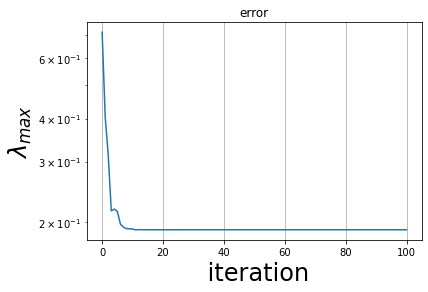

e.vec. =  [0.21591799 0.43183598 0.43183598 0.60189634 0.46704988]
e.val. =  0.9818164329301237
final_error =  0.1898328001910324


In [207]:
x0 = np.random.random(5)
A = np.array([[2,-1],[-1,2]])
num_iter = 100
G = np.array([[0,0,1,0,0], [1,0,1,0,0], [0,1,0,0,0], [0,0,0,0,1],[0,0,0,1,0]])
print('adjacency matrix = ',G)
A = pagerank_matrix(G)


x, l, res = power_method(A, x0, num_iter)
plt.plot(res)
# plt.plot(ns, time_n_jax)
plt.title('error')
plt.ylabel(r"$\lambda_{max}$", fontsize=24)
plt.xlabel(r" iteration", fontsize=24)
# plt.legend(['lu_decomposition time ', 'scipy time'])
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.yscale('log')
plt.show()
print('e.vec. = ', x)
print('e.val. = ', l)
print('final_error = ', res[-1])
# scipy.linalg.eig(A)

Problem is that this matrix has two different biggest(in absolute sense) eigvals: $1$ and $-1$. So there is no guarantee of convergence in this case.

#### Consider the same graph, but with additional self loop at node 4 (self loop is an edge that connects a vertex with itself). Plot residuals as in the previous task and discuss the convergence. Now, run the power method with num_iter=100 for 10 different initial guesses and print/plot the resulting approximated eigenvectors. Why do they depend on the initial guess?

[[0 0 1 0 0]
 [1 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 1]]
0-th eigenvector is [0.22003127 0.44006254 0.44006254 0.33593933 0.67187865]
1-th eigenvector is [0.30074285 0.6014857  0.6014857  0.19286454 0.38572908]
2-th eigenvector is [0.28865264 0.57730529 0.57730529 0.22365906 0.44731811]
3-th eigenvector is [0.24856627 0.49713253 0.49713253 0.29797091 0.59594181]
4-th eigenvector is [0.32227328 0.64454656 0.64454656 0.11424481 0.22848963]
5-th eigenvector is [0.23613085 0.4722617  0.4722617  0.3156517  0.63130341]
6-th eigenvector is [0.29894225 0.5978845  0.5978845  0.19783922 0.39567843]
7-th eigenvector is [0.27841164 0.55682328 0.55682328 0.24591975 0.49183951]
8-th eigenvector is [0.23704853 0.47409707 0.47409707 0.31441117 0.62882235]
9-th eigenvector is [0.23350809 0.46701618 0.46701618 0.31914441 0.63828881]


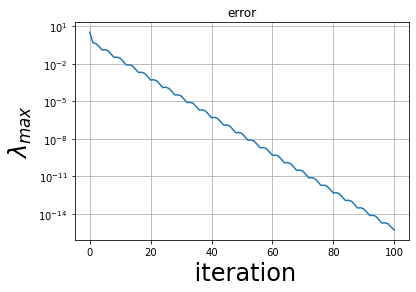

e.vec. =  [0.23350809 0.46701618 0.46701618 0.31914441 0.63828881]
e.val. =  1.0000000000000002
final_error =  5.273559366969494e-16
(array([-0.5+0.5j, -0.5-0.5j,  1. +0.j , -0.5+0.j ,  1. +0.j ]), array([[ 0.35355339+0.35355339j,  0.35355339-0.35355339j,
         0.33333333+0.j        ,  0.        +0.j        ,
         0.        +0.j        ],
       [ 0.35355339-0.35355339j,  0.35355339+0.35355339j,
         0.66666667+0.j        ,  0.        +0.j        ,
         0.        +0.j        ],
       [-0.70710678+0.j        , -0.70710678-0.j        ,
         0.66666667+0.j        ,  0.        +0.j        ,
         0.        +0.j        ],
       [ 0.        +0.j        ,  0.        -0.j        ,
         0.        +0.j        , -0.70710678+0.j        ,
        -0.4472136 +0.j        ],
       [ 0.        +0.j        ,  0.        -0.j        ,
         0.        +0.j        ,  0.70710678+0.j        ,
        -0.89442719+0.j        ]]))
[[0.  0.  0.5 0.  0. ]
 [1.  0.  0.5 0.  0. ]
 [0.

In [253]:
####################################################################
x0 = np.random.random(5)
num_iter = 100
G = np.array([[0,0,1,0,0], [1,0,1,0,0], [0,1,0,0,0], [0,0,0,0,1],[0,0,0,1,1]])
print(G)
A = pagerank_matrix(G)

for i in range(10):
    x0 = np.random.random(5)
    x, l, res = power_method(A, x0, num_iter)
    print(f"{i}-th eigenvector is", x)
plt.plot(res)
# plt.plot(ns, time_n_jax)
plt.title('error')
plt.ylabel(r"$\lambda_{max}$", fontsize=24)
plt.xlabel(r" iteration", fontsize=24)
# plt.legend(['lu_decomposition time ', 'scipy time'])
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.yscale('log')
plt.show()
print('e.vec. = ', x)
print('e.val. = ', l)
print('final_error = ', res[-1])
# print(scipy.linalg.eig(A))

They depend on the initial guess, since the subspace corresponding to the largest eigenvalue is not one-dimensional. So in the end, the final eigenvector is not unique even under the condition of normalization.

Now, run the power method with $A_d$ and plot residuals $\|A_d x_k - \lambda_k x_k\|_2$ as a function of $k$ for $d=0.97$, ```num_iter=100``` and a random initial guess ```x0```.


 Find the second largest in the absolute value eigenvalue of the obtained matrix $A_d$. How and why is it connected to the damping factor $d$? What is the convergence rate of the PageRank algorithm when using damping factor?

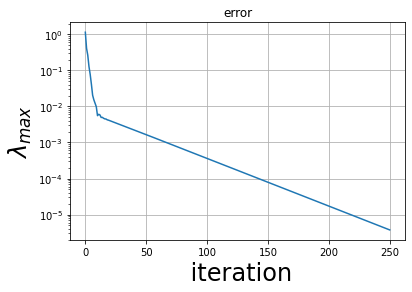

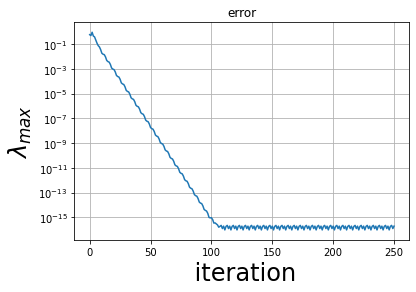

e.vec. =  [-0.21275478 -0.42539811 -0.4253617   0.34428749  0.68869834]
second e.val. =  0.9700000533772992
final_error =  1.942890293094024e-16


In [288]:
####################################################################
x0 = np.random.random(5)
num_iter = 250
G = np.array([[0,0,1,0,0], [1,0,1,0,0], [0,1,0,0,0], [0,0,0,0,1],[0,0,0,1,1]])
d = 0.97
A = pagerank_matrix(G) * d + np.ones(G.shape) * (1 - d) / G.shape[0]


x, l, res = power_method(A, x0, num_iter)
plt.plot(res)
# plt.plot(ns, time_n_jax)
plt.title('error')
plt.ylabel(r"$\lambda_{max}$", fontsize=24)
plt.xlabel(r" iteration", fontsize=24)
# plt.legend(['lu_decomposition time ', 'scipy time'])
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.yscale('log')
plt.show()
# print(x.reshape((x.shape[0],1))@x.reshape((x.shape[0],1)).T)
x, l, res = power_method(A - x.reshape((x.shape[0],1))@x.reshape((x.shape[0],1)).T, x0, num_iter)
plt.plot(res)
# plt.plot(ns, time_n_jax)
plt.title('error')
plt.ylabel(r"$\lambda_{max}$", fontsize=24)
plt.xlabel(r" iteration", fontsize=24)
# plt.legend(['lu_decomposition time ', 'scipy time'])
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.yscale('log')
plt.show()

print('e.vec. = ', x)
print('second e.val. = ', l)
print('final_error = ', res[-1])
# print(np.linalg.eig(A)[0])

We see that second largest eigval equals $d$. Now let's prove that it's true.
Again we will work with the transposed matrix (with the left multiplication of the matrix by the vector). Again, we will use the graph incoherence, that is, the block structure of the matrix $A$. We remember that  
$x_1 = (c,c,c,0,0)$   
$x_2 = (0,0,0,b,b)$:   
$x_1A = x_1$, $x_2A = x_2$
Suppose 

$$
    F = \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix}
$$
Now consider $x_1 = (1,1,1,0,0)$ and $x_2 = (0,0,0,-3/2,-3/2)$. And assume $y = x_1+x_2 \Rightarrow $ $yF = 0$. But $yA=y \Rightarrow yA_d = dy+0 = dy$. From formulas from lecture we know that convegence rate is $O\left(\left(\frac{d}{1}\right)^n\right)$

* (2 pts) Run the power method for the graph presented above and plot residuals $\|Ax_k - \lambda_k x_k\|_2$ as a function of $k$ for ```num_iter=100``` and random initial guess ```x0```.  Explain the absence of convergence. 


* (2 pts) Consider the same graph, but with additional self loop at node 4 (self loop is an edge that connects a vertex with itself). Plot residuals as in the previous task and discuss the convergence. Now, run the power method with ```num_iter=100``` for 10 different initial guesses and print/plot the resulting approximated eigenvectors. Why do they depend on the initial guess?


In order to avoid this problem Larry Page and Sergey Brin [proposed](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf) to use the following regularization technique:

$$
A_d = dA + \frac{1-d}{N} \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix},
$$

where $d$ is a small parameter in $[0,1]$ (typically $d=0.85$), which is called **damping factor**, $A$ is of size $N\times N$. Now $A_d$ is the matrix with multiplicity of the largest eigenvalue equal to 1. 
Recall that computing the eigenvector of the PageRank matrix, which corresponds to the largest eigenvalue, has the following interpretation. Consider a person who stays in a random node of a graph (i.e. opens a random web page); at each step s/he follows one of the outcoming edges uniformly at random (i.e. opens one of the links). So the person randomly walks through the graph and the eigenvector we are looking for is exactly his/her stationary distribution â€” for each node it tells you the probability of visiting this particular node. Therefore, if the person has started from a part of the graph which is not connected with the other part, he will never get there.  In the regularized model, the person at each step follows one of the outcoming links with probability $d$ OR teleports to a random node from the whole graph with probability $(1-d)$.

* (2 pts) Now, run the power method with $A_d$ and plot residuals $\|A_d x_k - \lambda_k x_k\|_2$ as a function of $k$ for $d=0.97$, ```num_iter=100``` and a random initial guess ```x0```.

* (5 pts) Find the second largest in the absolute value eigenvalue of the obtained matrix $A_d$. How and why is it connected to the damping factor $d$? What is the convergence rate of the PageRank algorithm when using damping factor?

Usually, graphs that arise in various areas are sparse (social, web, road networks, etc.) and, thus, computation of a matrix-vector product for corresponding PageRank matrix $A$ is much cheaper than $\mathcal{O}(N^2)$. However, if $A_d$ is calculated directly, it becomes dense and, therefore, $\mathcal{O}(N^2)$ cost grows prohibitively large for  big $N$.


* (2 pts) Implement fast matrix-vector product for $A_d$ as a function ```pagerank_matvec(A, d, x)```, which takes a PageRank matrix $A$ (in sparse format, e.g., ```csr_matrix```), damping factor $d$ and a vector $x$ as an input and returns $A_dx$ as an output. 

* (1 pts) Generate a random adjacency matrix of size $10000 \times 10000$ with only 100 non-zero elements and compare ```pagerank_matvec``` performance with direct evaluation of $A_dx$.

In [101]:
# INPUT:  A - np.ndarray (2D), d - float (from 0.0 to 1.0), x - np.ndarray (1D, size of A.shape[0/1])
# OUTPUT: y - np.ndarray (1D, size of x)
import timeit
def pagerank_matvec(A, d, x): # 2 pts
    y = A.dot(x) * d + x.sum() * (1 - d) / A.shape[0]
    return y
number = 10
d = 0.85
N = 10000
x = np.zeros(N**2)
x[:100] = 1
np.random.shuffle(x)
A = x.reshape((N,N))
x = np.random.random(N)
B = scipy.sparse.csr_matrix(A)
t_slow = timeit.timeit(stmt = '(A * d + np.ones((N,N)) * (1 - d) / N)@x', number = number, globals=globals()) / number
t_fast = timeit.timeit(stmt = 'pagerank_matvec(B, d, x)', number = number, globals=globals()) / number
print('slow mul time = ', t_slow)
print('fast mul time = ', t_fast)
print(f'sparse pagerank_matvec is {t_slow / t_fast} times faster in our example')

slow mul time =  0.431115424100426
fast mul time =  3.516060023684986e-05
sparse pagerank_matvec is 12261.321513180486 times faster in our example


#### DBLP: computer science bibliography

Download the dataset from [here](https://goo.gl/oZVxEa), unzip it and put `dblp_authors.npz`  and `dblp_graph.npz` in the same folder with this notebook. Each value (author name) from `dblp_authors.npz` corresponds to the row/column of the matrix from `dblp_graph.npz`. Value at row `i` and column `j` of the matrix from `dblp_graph.npz` corresponds to the number of times author `i` cited papers of the author `j`. Let us now find the most significant scientists according to PageRank model over DBLP data.

* (4 pts) Load the weighted adjacency matrix and the authors list into Python using ```load_dblp(...)``` function. Print its density (fraction of nonzero elements). Find top-10 most cited authors from the weighted adjacency matrix. Now, make all the weights of the adjacency matrix equal to 1 for simplicity (consider only existence of connection between authors, not its weight). Obtain the PageRank matrix $A$ from the adjacency matrix and verify that it is stochastic.
 
 
* (1 pts) In order to provide ```pagerank_matvec``` to your ```power_method``` (without rewriting it) for fast calculation of $A_dx$, you can create a ```LinearOperator```: 
```python
L = scipy.sparse.linalg.LinearOperator(A.shape, matvec=lambda x, A=A, d=d: pagerank_matvec(A, d, x))
```
Calling ```L@x``` or ```L.dot(x)``` will result in calculation of ```pagerank_matvec(A, d, x)``` and, thus, you can plug $L$ instead of the matrix $A$ in the ```power_method``` directly. **Note:** though in the previous subtask graph was very small (so you could disparage fast matvec implementation), here it is very large (but sparse), so that direct evaluation of $A_dx$ will require $\sim 10^{12}$ matrix elements to store - good luck with that (^_<).


* (2 pts) Run the power method starting from the vector of all ones and plot residuals $\|A_dx_k - \lambda_k x_k\|_2$  as a function of $k$ for $d=0.85$.


* (1 pts) Print names of the top-10 authors according to PageRank over DBLP when $d=0.85$. Comment on your findings.

In [216]:
from scipy.sparse import load_npz
import numpy as np
def load_dblp(path_auth, path_graph):
    G = load_npz(path_graph).astype(float)
    with np.load(path_auth) as data: authors = data['authors']
    return G, authors
G, authors = load_dblp('dblp_authors.npz', 'dblp_graph.npz')

In [217]:
print('density of G = ',G.count_nonzero() / G.shape[0] / G.shape[1])
a = np.array(G.sum(axis=0))
a = a.reshape(a.shape[1])
b = a.copy()
# print(a.argmax())
# a[a.argmax()]
popular_authors = []
for i in range(10):
    popular_authors.append(a.argmax())
    a[a.argmax()] = 0
# print(popular_authors)
# print(b[popular_authors])
print('Top-10 most cited authors', authors[popular_authors])

density of G =  4.498651815230578e-05
Top-10 most cited authors ['Scott Shenker' 'Andrew Zisserman' 'Hari Balakrishnan' 'Jiawei Han'
 'Anil K. Jain' 'Cordelia Schmid' 'Jitendra Malik' 'Ion Stoica'
 'David E. Culler' 'David G. Lowe']


In [218]:
B = G.copy()
G

<1766547x1766547 sparse matrix of type '<class 'numpy.float64'>'
	with 140388901 stored elements in Compressed Sparse Row format>

In [219]:
# B[B.nonzero()] = 1 #very slow
B = B.astype(bool)

In [220]:
# A = pagerank_matrix(G.transpose())
A = pagerank_matrix(B.transpose())

<ipython-input-16-904d057a09b7>:8: RuntimeWarning: divide by zero encountered in true_divide
  return G.multiply(1 / G.sum(axis=0))


In [221]:
import scipy.sparse.linalg
d = 0.85
L = scipy.sparse.linalg.LinearOperator(A.shape, matvec=lambda x, A=A, d=d: pagerank_matvec(A, d, x))

In [222]:
x0 = np.ones((A.shape[0],1))
num_iter = 40
L.shape

(1766547, 1766547)

In [223]:
x, l, res = power_method(L, x0, num_iter)

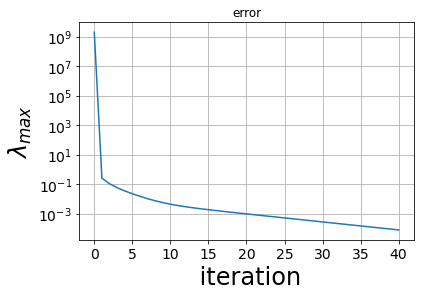

e.vec. =  [[9.79523764e-05]
 [4.92107292e-05]
 [3.37517048e-04]
 ...
 [2.25270156e-05]
 [2.25270156e-05]
 [2.25270156e-05]]
e.val. =  [[0.96235312]]
final_error =  8.019021857066382e-05


In [224]:
plt.plot(res)
# plt.plot(ns, time_n_jax)
plt.title('error')
plt.ylabel(r"$\lambda_{max}$", fontsize=24)
plt.xlabel(r" iteration", fontsize=24)
# plt.legend(['lu_decomposition time ', 'scipy time'])
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.show()
print('e.vec. = ', x)
print('e.val. = ', l)
print('final_error = ', res[-1])

In [225]:
np.linalg.norm(L@x - l*x)

8.019021857066382e-05

In [226]:
c = x.copy()
d = c.copy()

In [227]:
popular_authors = []
for i in range(10):
    popular_authors.append(c.argmax())
    c[c.argmax()] = 0
# print(popular_authors)
# print(b[popular_authors])
print('Top-10 most cited authors', authors[popular_authors])

Top-10 most cited authors ['David E. Goldberg' 'Richard M. Karp' 'John E. Hopcroft'
 'Azriel Rosenfeld' 'Ronald L. Rivest' 'Anil K. Jain' 'Takeo Kanade'
 'Alfred V. Aho' 'Robert Endre Tarjan' 'Gerard Salton']


['Scott Shenker' 'Andrew Zisserman' 'Hari Balakrishnan' 'Jiawei Han'
 'Anil K. Jain' 'Cordelia Schmid' 'Jitendra Malik' 'Ion Stoica'
 'David E. Culler' 'David G. Lowe']


Interestingly, it turned out to be a completely different list. This suggests that the weights in the old matrix were important. Perhaps they took into account the number of citations

## Problem 3. QR algorithm (33 pts)

* Implement QR-algorithm without shifts. Prototype of the function is given below

In [233]:
import numpy as np
# INPUT: 
# A_init - square matrix, 
# num_iter - number of iterations for QR algorithm
# OUTPUT: 
# Ak - transformed matrix A_init given by QR algorithm, 
# convergence - numpy array of shape (num_iter, ), 
# where we store the maximal number from the Chebyshev norm 
# of triangular part of the Ak for every iteration
def qr_algorithm(A_init, num_iter): # 3 pts
    A = A_init.copy()
    convergence = np.zeros(num_iter)
    mask = np.ones(A_init.shape)
    mask[np.triu_indices(A_init.shape[0])] = 0
    for i in range(num_iter):
        Q,R = np.linalg.qr(A)
        A = R@Q
        convergence[i] = np.max(np.abs(A*mask))
        Ak = A
    return Ak, convergence

#### Symmetric case (3 pts)
- Create symmetric tridiagonal $11 \times 11$ matrix with elements $-1, 2, -1$ on sub-, main- and upper diagonal respectively without using loops.
- Run $400$ iterations of the QR algorithm for this matrix.
- Plot the output matrix with function ```plt.spy(Ak, precision=1e-7)```.
- Plot convergence of QR-algorithm.

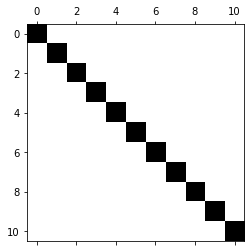

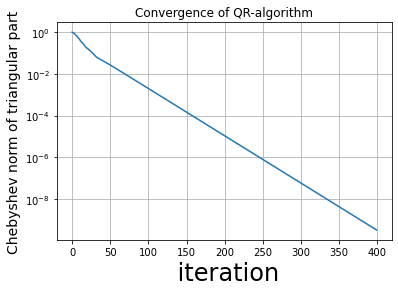

In [4]:
from scipy.sparse import diags
import matplotlib.pyplot as plt
%matplotlib inline
n = 11
num_iter = 400
diag_broadcast = np.array([-1,2,-1])
diagonals = [np.ones(n) * diag_broadcast[1], np.ones(n-1) * diag_broadcast[0], np.ones(n-1) * diag_broadcast[2]]
A_init = diags(diagonals, [0,-1,1]).toarray()
# print(A_init.toarray())
Ak, convergence = qr_algorithm(A_init, num_iter)
plt.spy(Ak, precision=1e-7)
plt.show()

plt.plot(convergence)
plt.title('Convergence of QR-algorithm')
plt.ylabel(r"Chebyshev norm of triangular part", fontsize=14)
plt.xlabel(r" iteration", fontsize=24)
# plt.legend(['lu_decomposition time ', 'scipy time'])
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.yscale('log')
plt.show()

#### Nonsymmetric case (5 pts)

- Create nonsymmetric tridiagonal $11 \times 11$ matrix with elements $5, 3, -2$ on sub-, main- and upper diagonal respectively without using loops.
- Run $250$ iterations of the QR algorithm for this matrix.
- Plot the result matrix with function ```plt.spy(Ak, precision=1e-7)```. Is this matrix lower triangular? How does this correspond to the claim about convergence of the QR algorithm?

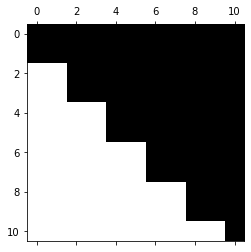

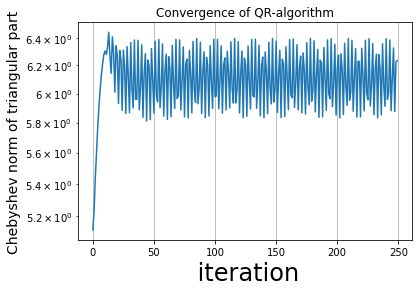

In [5]:
n = 11
num_iter = 250
diag_broadcast = np.array([5,3,-2])
diagonals = [np.ones(n) * diag_broadcast[1], np.ones(n-1) * diag_broadcast[0], np.ones(n-1) * diag_broadcast[2]]
A_init = diags(diagonals, [0,-1,1]).toarray()
# print(A_init.toarray())
Ak, convergence = qr_algorithm(A_init, num_iter)
plt.spy(Ak, precision=1e-7)
plt.show()

plt.plot(convergence)
plt.title('Convergence of QR-algorithm')
plt.ylabel(r"Chebyshev norm of triangular part", fontsize=14)
plt.xlabel(r" iteration", fontsize=24)
# plt.legend(['lu_decomposition time ', 'scipy time'])
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.yscale('log')
plt.show()

This matrix is non upper triangular. It contradicts to claim about convergence of the QR algorithm

### QR algorithms with Rayleigh Quotient shift (10 pts)

In the lectures the Rayleigh Quotient shift was introduced to speed up convergence of power method. Here we ask you to generalize this approach to construct the shifts in QR algorithm.

- How to compute the Rayleigh Quotient shift in QR algorithm fast? Provide formulas and explanations how they can be simplified.
- Implement explicit QR algorithm with Rayleigh Quotient shift. Please do not worry about implicit orthogonalization, we want to compare convergence only in terms of iterations.
- Test your implementation in the symmetric case. Plot the convergence of QR algorithm with and without shift. Choose the dimension $n \sim 100 $ for more representative results. 
- How the convergence of the shifted algorithm compares to the simple QR? Why? 

Assume 
$$
P  = \begin{pmatrix}
0  & \ldots & 0 & 1 \\
0  & \ldots & 1 & 0 \\
\ldots & \ldots & \ldots & \ldots \\
1  & \ldots & 0 & 0 \\
\end{pmatrix}
$$
Note that $A^{-k} = Q^{(k)}(R^{(k)})^{-T}$ and since $P^2=I \Rightarrow A^{-k}P = \underbrace{\left( Q^{(k)}P \right)}_{\text{unitary}}  \underbrace{\left(P (R^{(k)})^{-T}P \right)}_{\text{upper triangular}}$. We get inversion of QR in application to vectors from standart basis cheaply. 
Let's estimate eigenvalue corresponding to last column of $Q^{(k)}$. Denote this column as $q^{(k)}_n$. It's normalized, therefore:  
$ q^{(k)T}_n A q^{(k)}_n = e_n^T Q^{(k)T}AQ^{(k)}e_n = e_n^T A^{(k)} e_n = A_{nn}$ - simplification.

In [326]:
def qr_algorithm_reileigh(A_init, num_iter):
    # enter your code here
    A = A_init.copy()
    n = A.shape[0]
    convergence = np.zeros(num_iter)
    mask = np.ones(A_init.shape)
    mask[np.triu_indices(n)] = 0
    x = np.ones(n)
    for i in range(num_iter):
#         lambda_k = x.T@A@x / (x.T@x)
        lambda_k = A[- 1,- 1]
        Q,R = np.linalg.qr(A - lambda_k * np.eye(n))
        A = R@Q + lambda_k * np.eye(n)
#         A = Q.T@A@Q
        convergence[i] = np.max(np.abs(A*mask))
    Ak = A
    return Ak, convergence

- Try QR with Rayleigh Quotient shift for a simple matrix $A = \begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}$. Does anything change from iteration to iteration? Does shift affect convergence here? Why?

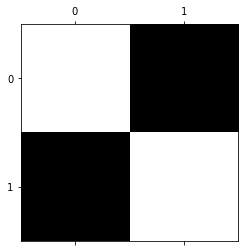

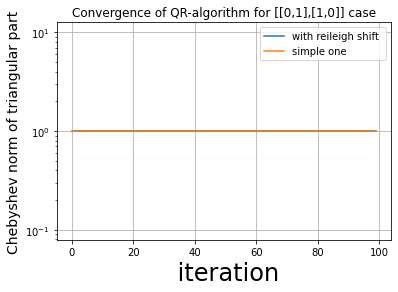

In [327]:
A_init = np.array([[0,1],[1,0]])
num_iter = 100
qr_algorithm_reileigh(A_init, num_iter)
Ak, convergence = qr_algorithm_reileigh(A_init, num_iter)
Ak_simple, conv_simple = qr_algorithm(A_init, num_iter)
plt.spy(Ak, precision=1e-7)
plt.show()

plt.plot(convergence)
plt.plot(conv_simple)
plt.title('Convergence of QR-algorithm for [[0,1],[1,0]] case')
plt.ylabel(r"Chebyshev norm of triangular part", fontsize=14)
plt.xlabel(r" iteration", fontsize=24)
plt.legend(['with reileigh shift ', 'simple one'])
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.yscale('log')
plt.show()

It does not affect convergence because at each iteration $A_{nn}=0$

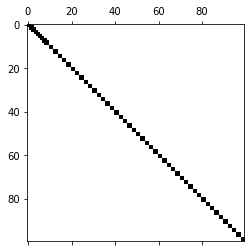

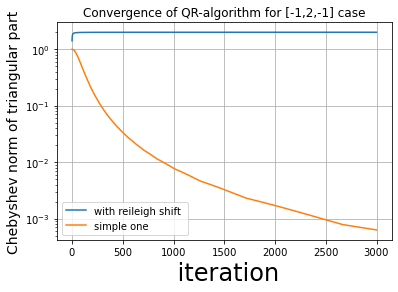

In [328]:
# Your solution is here Symmetric case
A_init = np.array([[0,1],[1,0]])
qr_algorithm_reileigh(A_init, num_iter)

n = 100
num_iter = 3000
diag_broadcast = np.array([-1,2,-1])
diagonals = [np.ones(n) * diag_broadcast[1], np.ones(n-1) * diag_broadcast[0], np.ones(n-1) * diag_broadcast[2]]
A_init = diags(diagonals, [0,-1,1]).toarray()
# A_init = np.random.random((n,n))
# A_init = A_init + A_init.T

Ak, convergence = qr_algorithm_reileigh(A_init, num_iter)
Ak_simple, conv_simple = qr_algorithm(A_init, num_iter)
plt.spy(Ak, precision=1e-7)
plt.show()

plt.plot(convergence)
plt.plot(conv_simple)
plt.title('Convergence of QR-algorithm for [-1,2,-1] case')
plt.ylabel(r"Chebyshev norm of triangular part", fontsize=14)
plt.xlabel(r" iteration", fontsize=24)
plt.legend(['with reileigh shift ', 'simple one'])
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.yscale('log')
plt.show()

This is the same problem as in previous small example. In fact with reileigh shift it's like QR decomposition with symmetric eigenvalues ($\exists \lambda_i+\lambda_j = 0$)

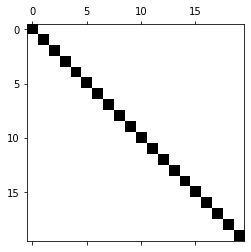

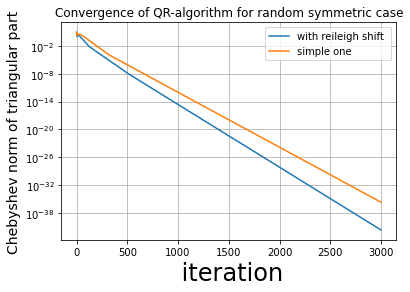

In [329]:
A_init = np.array([[0,1],[1,0]])
qr_algorithm_reileigh(A_init, num_iter)

n = 20
num_iter = 3000
# diag_broadcast = np.array([-1,2,-1])
# diagonals = [np.ones(n) * diag_broadcast[1], np.ones(n-1) * diag_broadcast[0], np.ones(n-1) * diag_broadcast[2]]
# A_init = diags(diagonals, [0,-1,1]).toarray()
A_init = np.random.random((n,n))
A_init = A_init + A_init.T

Ak, convergence = qr_algorithm_reileigh(A_init, num_iter)
Ak_simple, conv_simple = qr_algorithm(A_init, num_iter)
plt.spy(Ak, precision=1e-7)
plt.show()

plt.plot(convergence)
plt.plot(conv_simple)
plt.title('Convergence of QR-algorithm for random symmetric case')
plt.ylabel(r"Chebyshev norm of triangular part", fontsize=14)
plt.xlabel(r" iteration", fontsize=24)
plt.legend(['with reileigh shift ', 'simple one'])
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.yscale('log')
plt.show()

For random symmetric matrix reileigh shift is better

### QR with Wilkinson shift  (15 pts)

To solve the problem that appears in the last example, we can use the Wilkinson shift:

$$\mu = a_m - \frac {sign(\delta) b^2_{m-1}} {(|\delta| + \sqrt{\delta^2 + b^2_{m-1}} )},$$

where $\delta = \frac{(a_{m-1} - a_m)}{2}$. If $\delta = 0$, then instead of $sign(\delta)$ you have to choose $1$ or $-1$ arbitrary.
The numbers $a_m, b_{m-1}, a_{m-1}$ are taken from matrix $B$:

$$
    B = 
    \begin{bmatrix} 
     a_{m-1} & b_{m-1} \\ 
     b_{m-1} & a_m \\ 
    \end{bmatrix},
$$  
which is a lower right bottom submatrix of $A^{(k)}$. Here $k$ is an iteration counter in QR algorithm.

- Compare convergence in the symmetric cases: 
    - distinctive eigenvalues
    - two coincident eigenvalues
    - maximum and minimum eigenvalues with the same absolute value
Choose the dimension $n \sim 100 $ for more representative results.
What do you observe? 

In [231]:
def qr_algorithm_wilkinson(A_init, num_iter):
    # enter your code here
    A = A_init.copy()
    n = A.shape[0]
    convergence = np.zeros(num_iter)
    mask = np.ones(A_init.shape)
    mask[np.triu_indices(n)] = 0
#     x = np.ones(n)
    for i in range(num_iter):
        B = A[-2:,-2:].copy()
#         print(B)
        delta = (B[0,0] - B[1,1]) / 2
        delta1 = np.sign(delta)
        if delta == 0:
            delta1 = 1
        mu = B[1,1] - np.sign(delta1) * B[0,1] ** 2 / (np.abs(delta) + np.sqrt(delta ** 2 + B[0,1]**2))
#         mu  = B[1,1] + delta - np.sign(delta1) * np.sqrt(delta**2+B[0,1] * B[1,0] / 4)
        
        Q,R = np.linalg.qr(A - mu * np.eye(n))
        A = R@Q + mu * np.eye(n)
#         A = Q.T@A@Q
        convergence[i] = np.max(np.abs(A*mask))
    Ak = A
    return Ak, convergence

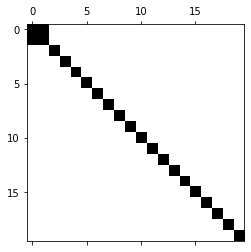

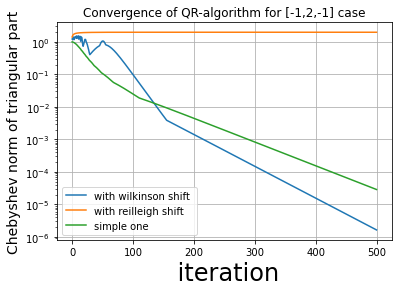

In [280]:
# Your solution is here
from scipy.sparse import diags


n = 20
num_iter = 500
diag_broadcast = np.array([-1,2,-1])
diagonals = [np.ones(n) * diag_broadcast[1], np.ones(n-1) * diag_broadcast[0], np.ones(n-1) * diag_broadcast[2]]
A_init = np.array(diags(diagonals, [0,-1,1]).toarray())

# A_init = np.random.random((n,n))
# A_init = A_init + A_init.T

# a = [[1.0/(i + j + 1) for i in range(n)] for j in range(n)]
# A_init = np.array(a)
# print('A_itit = ', A_init)
Ak, convergence = qr_algorithm_wilkinson(A_init, num_iter)
Ak_reilleigh, conv_reileigh = qr_algorithm_reileigh(A_init, num_iter)
Ak_simple, conv_simple = qr_algorithm(A_init, num_iter)
plt.spy(Ak, precision=1e-7)
plt.show()

plt.plot(convergence)
plt.plot(conv_reileigh)
plt.plot(conv_simple)
plt.title('Convergence of QR-algorithm for [-1,2,-1] case')
plt.ylabel(r"Chebyshev norm of triangular part", fontsize=14)
plt.xlabel(r" iteration", fontsize=24)
plt.legend(['with wilkinson shift ', 'with reilleigh shift ' , 'simple one'])
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.yscale('log')
plt.show()

Wilkinson is faster and does not fails as reilleight. That's what we wanted)

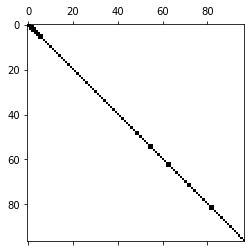

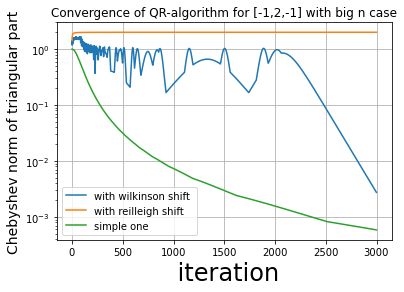

In [249]:
n = 97
num_iter = 3000
diag_broadcast = np.array([-1,2,-1])
diagonals = [np.ones(n) * diag_broadcast[1], np.ones(n-1) * diag_broadcast[0], np.ones(n-1) * diag_broadcast[2]]
A_init = np.array(diags(diagonals, [0,-1,1]).toarray())

# A_init = np.random.random((n,n))
# A_init = A_init + A_init.T

# a = [[1.0/(i + j + 1) for i in range(n)] for j in range(n)]
# A_init = np.array(a)
# print('A_itit = ', A_init)
Ak, convergence = qr_algorithm_wilkinson(A_init, num_iter)
Ak_reilleigh, conv_reileigh = qr_algorithm_reileigh(A_init, num_iter)
Ak_simple, conv_simple = qr_algorithm(A_init, num_iter)
plt.spy(Ak, precision=1e-7)
plt.show()

plt.plot(convergence)
plt.plot(conv_reileigh)
plt.plot(conv_simple)
plt.title('Convergence of QR-algorithm for [-1,2,-1] with big n case')
plt.ylabel(r"Chebyshev norm of triangular part", fontsize=14)
plt.xlabel(r" iteration", fontsize=24)
plt.legend(['with wilkinson shift ', 'with reilleigh shift ' , 'simple one'])
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.yscale('log')
plt.show()

Wilkinson wants to converge faster, but does not have time. Maybe he didn't have enough iterations. In fact, it's very unstable

[[ 1  1  0 ...  0  0  0]
 [ 2  2  0 ...  0  0  0]
 [ 0  0  3 ...  0  0  0]
 ...
 [ 0  0  0 ... 88  0  0]
 [ 0  0  0 ...  0 89  0]
 [ 0  0  0 ...  0  0 90]]


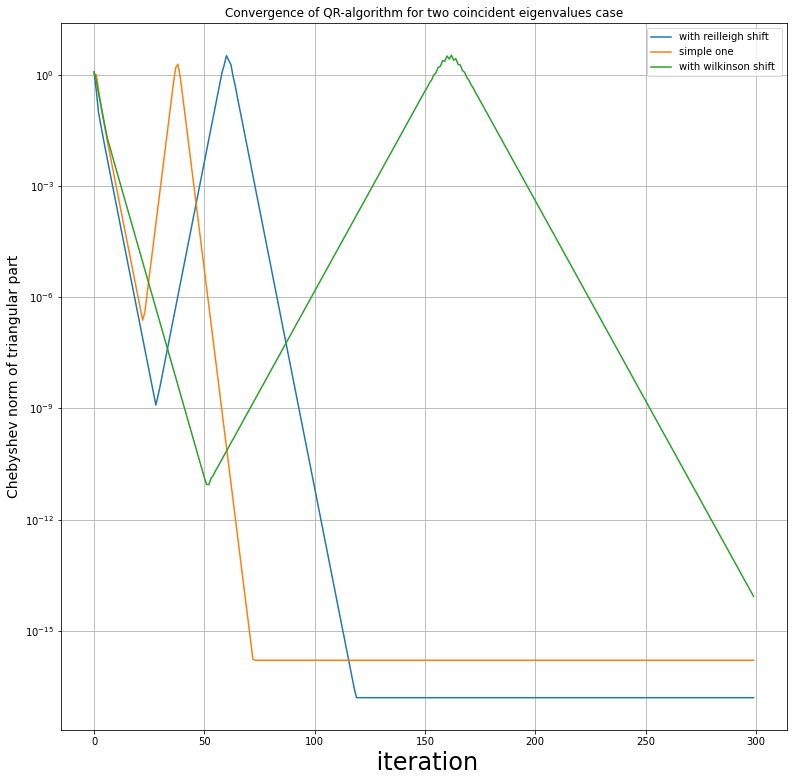

In [279]:
import scipy.stats
from scipy.stats import gmean
def generate_random_symmetric(diagonal):#finally, it's useless
    n = diagonal.shape[0]
    T = np.diag(diagonal)
    B = np.random.random((n,n))
    Q,R = np.linalg.qr(B)
    return Q.T@T@Q
# n = 10
# diagonal = np.array(np.arange(n)) / n
# diagonal[0] = 9
# diag_broadcast = np.array([-1,3,-1])
# diagonals = [np.ones(n) * diag_broadcast[1], np.ones(n-1) * diag_broadcast[0], np.ones(n-1) * diag_broadcast[2]]
# A_init = np.array(diags(diagonals, [0,-1,1]).toarray())

A_init = np.array([[0,1,1,0,0],[0,3,2,0,0], [0,3,4,0,0], [1,0,0,1,0],[0,0,0,1,2]])

# n = 90
# I = np.diag(range(1,n+1))
# I[0,1] = 1
# I[1,0] = 2
# print(I)
# A_init = I + np.eye(n)
# diagonal = np.random.random(n)

num_iter = 300
iterations = 2
usual = np.zeros((iterations, num_iter))
reileigh = np.zeros((iterations, num_iter))
wilkinson = np.zeros((iterations, num_iter))
for i in range(iterations):
    Ak, wilkinson[i,:] = qr_algorithm_wilkinson(A_init, num_iter)
    Ak_reilleigh, reileigh[i,:] = qr_algorithm_reileigh(A_init, num_iter)
    Ak_simple, usual[i,:] = qr_algorithm(A_init, num_iter)
wilkinson = wilkinson.mean(axis=0)
reileigh = reileigh.mean(axis=0)
usual = usual.mean(axis=0)

##############################
# wilkinson = gmean(wilkinson, axis=0)
# reileigh = gmean(reileigh, axis=0)
# usual = gmean(usual, axis=0)
##############################
plt.figure(figsize=(13, 13))

plt.plot(reileigh)
plt.plot(usual)
plt.plot(wilkinson)
plt.title('Convergence of QR-algorithm for two coincident eigenvalues small n case')
plt.ylabel(r"Chebyshev norm of triangular part", fontsize=14)
plt.xlabel(r" iteration", fontsize=24)
plt.legend([ 'with reilleigh shift ' , 'simple one', 'with wilkinson shift '])
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.yscale('log')
plt.show()
 
    

[[ 1  1  0 ...  0  0  0]
 [ 2  2  0 ...  0  0  0]
 [ 0  0  3 ...  0  0  0]
 ...
 [ 0  0  0 ... 88  0  0]
 [ 0  0  0 ...  0 89  0]
 [ 0  0  0 ...  0  0 90]]


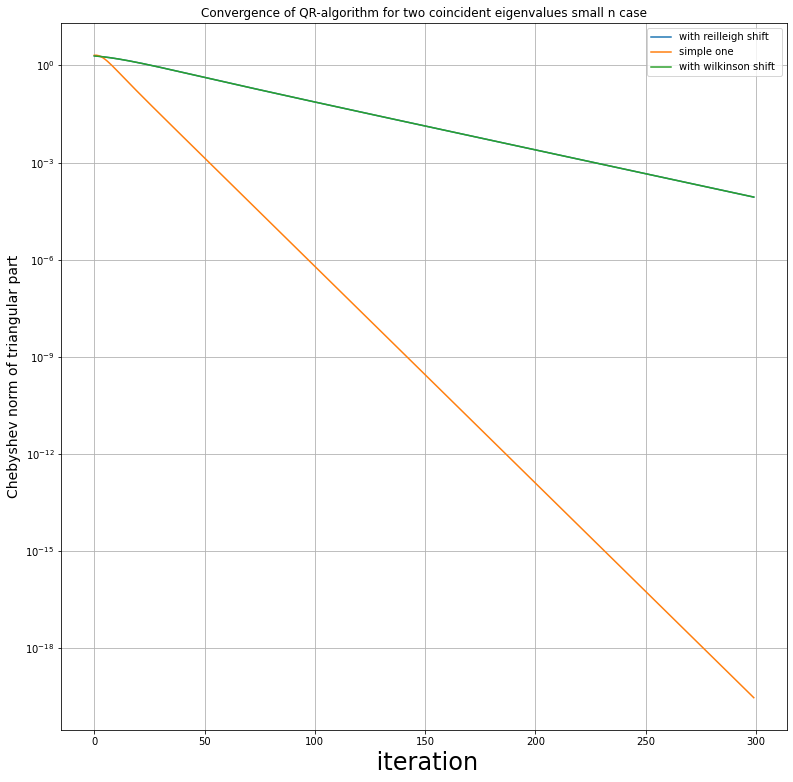

In [281]:
import scipy.stats
from scipy.stats import gmean
def generate_random_symmetric(diagonal):#finally, it's useless
    n = diagonal.shape[0]
    T = np.diag(diagonal)
    B = np.random.random((n,n))
    Q,R = np.linalg.qr(B)
    return Q.T@T@Q
# n = 10
# diagonal = np.array(np.arange(n)) / n
# diagonal[0] = 9
# diag_broadcast = np.array([-1,3,-1])
# diagonals = [np.ones(n) * diag_broadcast[1], np.ones(n-1) * diag_broadcast[0], np.ones(n-1) * diag_broadcast[2]]
# A_init = np.array(diags(diagonals, [0,-1,1]).toarray())

# A_init = np.array([[0,1,1,0,0],[0,3,2,0,0], [0,3,4,0,0], [1,0,0,1,0],[0,0,0,1,2]])

n = 90
I = np.diag(range(1,n+1))
I[0,1] = 1
I[1,0] = 2
print(I)
A_init = I + 18*np.eye(n)
diagonal = np.random.random(n)

num_iter = 300
iterations = 2
usual = np.zeros((iterations, num_iter))
reileigh = np.zeros((iterations, num_iter))
wilkinson = np.zeros((iterations, num_iter))
for i in range(iterations):
    Ak, wilkinson[i,:] = qr_algorithm_wilkinson(A_init, num_iter)
    Ak_reilleigh, reileigh[i,:] = qr_algorithm_reileigh(A_init, num_iter)
    Ak_simple, usual[i,:] = qr_algorithm(A_init, num_iter)
wilkinson = wilkinson.mean(axis=0)
reileigh = reileigh.mean(axis=0)
usual = usual.mean(axis=0)

##############################
# wilkinson = gmean(wilkinson, axis=0)
# reileigh = gmean(reileigh, axis=0)
# usual = gmean(usual, axis=0)
##############################
plt.figure(figsize=(13, 13))

plt.plot(reileigh)
plt.plot(usual)
plt.plot(wilkinson)
plt.title('Convergence of QR-algorithm for two coincident eigenvalues small n case')
plt.ylabel(r"Chebyshev norm of triangular part", fontsize=14)
plt.xlabel(r" iteration", fontsize=24)
plt.legend([ 'with reilleigh shift ' , 'simple one', 'with wilkinson shift '])
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.yscale('log')
plt.show()

It is very strange for with a small matrix and two matching eigenvalues. And it looks like simple QR is better in my particular case...

In [264]:
# diagonal = np.array(np.arange(10)) / 10
# diagonal[1] = 5

# num_iter = 600
# iterations = 50
# usual = np.zeros((iterations, num_iter))
# reileigh = np.zeros((iterations, num_iter))
# wilkinson = np.zeros((iterations, num_iter))
# for i in range(iterations):
#     A_init = generate_random_symmetric(diagonal)
#     A_init = A_init + A_init.T
#     Ak, wilkinson[i,:] = qr_algorithm_wilkinson(A_init, num_iter)
#     Ak_reilleigh, reileigh[i,:] = qr_algorithm_reileigh(A_init, num_iter)
#     Ak_simple, usual[i,:] = qr_algorithm(A_init, num_iter)
# #     print(np.linalg.eig(A_init)[0])
# wilkinson = wilkinson.mean(axis=0)
# reileigh = reileigh.mean(axis=0)
# usual = usual.mean(axis=0)

# plt.figure(figsize=(13, 13))
# plt.plot(wilkinson)
# plt.plot(reileigh)
# plt.plot(usual)
# plt.title('Convergence of QR-algorithm for two coincident eigenvalues case')
# plt.ylabel(r"Chebyshev norm of triangular part", fontsize=14)
# plt.xlabel(r" iteration", fontsize=24)
# plt.legend(['with wilkinson shift ', 'with reilleigh shift ' , 'simple one'])
# plt.grid(True)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.yscale('log')
# plt.show()

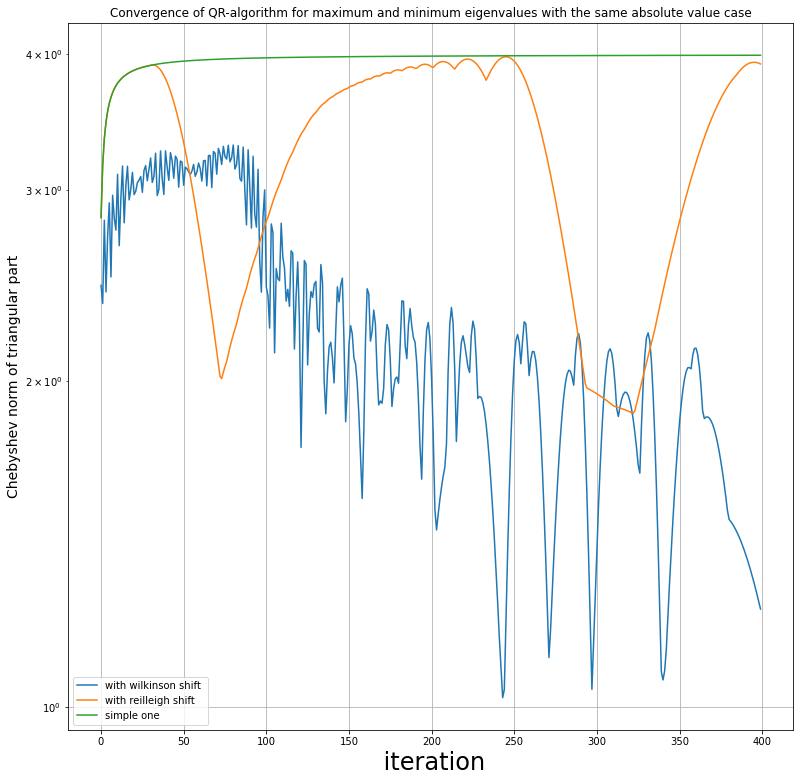

In [265]:
diagonal = np.array(np.arange(5)) / 5
diagonal[1] = -4

num_iter = 400
iterations = 3
usual = np.zeros((iterations, num_iter))
reileigh = np.zeros((iterations, num_iter))
wilkinson = np.zeros((iterations, num_iter))
for i in range(iterations):
    n = 100
    diag_broadcast = np.array([-2,0,-2])
    diagonals = [np.ones(n) * diag_broadcast[1], np.ones(n-1) * diag_broadcast[0], np.ones(n-1) * diag_broadcast[2]]
    A_init = np.array(diags(diagonals, [0,-1,1]).toarray())
#     A_init = generate_random_symmetric(diagonal)
    Ak, wilkinson[i,:] = qr_algorithm_wilkinson(A_init, num_iter)
    Ak_reilleigh, reileigh[i,:] = qr_algorithm_reileigh(A_init, num_iter)
    Ak_simple, usual[i,:] = qr_algorithm(A_init, num_iter)
#     print(np.linalg.eig(A_init)[0])
wilkinson = wilkinson.mean(axis=0)
reileigh = reileigh.mean(axis=0)
usual = usual.mean(axis=0)

plt.figure(figsize=(13, 13))
plt.plot(wilkinson)
plt.plot(reileigh)
plt.plot(usual)
plt.title('Convergence of QR-algorithm for maximum and minimum eigenvalues with the same absolute value case')
plt.ylabel(r"Chebyshev norm of triangular part", fontsize=14)
plt.xlabel(r" iteration", fontsize=24)
plt.legend(['with wilkinson shift ', 'with reilleigh shift ' , 'simple one'])
plt.grid(True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.yscale('log')
plt.show()

Wilkinson helps here. Simple QR breaks(as simple power method)

## Problem 4. (Movie Recommender system) 15 pts

Imagine the world without NLA where you have free evenings and you can watch movies!  
But it is always hard to choose a movie to watch. 
In this problem we suggest you to build your own movie recommender system based on SVD decomposition, so you can combine two perfect things: Numerical Linear Algebra and cinematography!

In order to build recommender system you need data. 
Here you are https://grouplens.org/datasets/movielens/1m/

Usually all recommender systems may be devided into two groups

#### Collaborative filtering. 

This approach is based on user-item interaction.
It has one important assumption: user who has liked an item in the past will also likes the same in the future. Suppose the user A likes the films about vampires. 
He is Twilight saga fan and he has watched the film "What we do in the shadows" and liked it or unliked it, in other words he evaluated it somehow. And suppose another user B, who has the similair behavior to the first user (he is also Twilight saga fan). And the chance, that he will estimate "What we do in the shadows" in the same way that user A did, is huge. So, the purpose of the collaborative filtering is to predict a user's behavior based on behavior of the simular users.

#### Content based filtering.

Collaborative filtering has some essential flaws. The main one is called "cold start". "Cold start" happens when the new user comes and he has not react anyhow to the items. So we do not know his past behavior and we do not know what to advise. Here content based filtering helps. Often resources gather some extra info about users and items before a user comes down to utilising the resource. So, for example we would know that user likes horror movies before he watched anything on the resource.


- In this task you will implement Collaborative filtering based on SVD (we will use the function from the proper package and check if the result recommender system advices the similar movies)

1) (1 pts)  Explore the data. Construct the interaction matrix $M$ of size $m \times n$ which contains the information of how a certain user rated a certain film. 

2) (5 pts)  Compute SVD of this matrix. Remeber that matrix $M$ is sparse (one user can hardly watch all the movies) so the good choice would be to use method from ```scipy.sparse.linalg``` package

$$ M = USV^{\top}, $$

where $U$ is a $m \times r $ orthogonal matrix with left singular vectors, which represents the relationship between users and latent factors, $S$ is a $r \times r $ diagonal matrix, which describes the strength of each latent factor and $V^\top$ is a $r \times n$ matrix with right singular vectors, which represent the embeddings of  items (movies in our case) in latent space.
Describe any simple heuristic to choose appropriate value for $r$ and explain why do you expect that it will work.


In [336]:
# Importing Libraries
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix

# Read the dataset
ratings = pd.read_csv('ratings.dat', sep="::", names=['UserID','Movie_id', 'Rating', 'Timestamp'])
users = pd.read_csv('users.dat', sep="::", names=['UserID','Gender','Age','Occupation','Zip-code'])
movies = pd.read_csv('movies.dat', sep="::", names=['MovieID','Title','Genres'], encoding = "ISO-8859-1")
# Create the interaction matrix
K = pd.pivot_table(ratings,
                   index = 'UserID',
                   columns = 'Movie_id', 
                   values = 'Rating'
                  )
K = K.fillna(0)
M = csr_matrix(K)

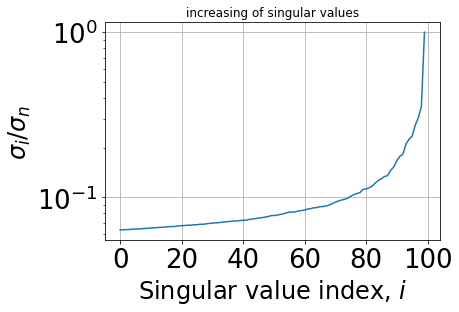

In [337]:
# Compute Singular Value Decomposition of interaction matrix. You can use built-in functions

import scipy.sparse
r = 100
u,s,vt = scipy.sparse.linalg.svds(M, k = r) # Update this line, it is just example

plt.semilogy((s/s[-1]))
plt.title('increasing of singular values')
plt.ylabel(r"$\sigma_i / \sigma_n$", fontsize=24)
plt.xlabel(r"Singular value index, $i$", fontsize=24)
plt.grid(True)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.show()

We have about 10-20 (I don't remember exactly) categories of films. Suppose that they will be represented in r. Also, the graph above says that leaving only the largest 20 singular values is a perfectly reasonable idea, since the others are more than 10 times smaller than the largest. (see final realization in class recommender). Later we'll see, that it is a little bit small and better to choose smth like $r=50-100$

3) (2 pts) In order to get weighted item-latent factors, we can multiply $S$ and $V^{T}$. Please, remember that $S$ is diagonal and multiply them efficiently.

In [172]:
def mult(s,vt):
    weighted = np.zeros(vt.shape)
    for i in range(s.shape[0]):
        weighted[i,:] = vt[i,:] * s[i]
    return weighted
%timeit a = np.diag(s)@vt
%timeit b = mult(s,vt)
%timeit np.reshape(s,(s.shape[0],1)) * vt
%timeit vt * np.reshape(s,(s.shape[0],1))
np.linalg.norm(np.diag(s)@vt - vt * np.reshape(s,(s.shape[0],1)))

2.57 ms ± 25.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.68 ms ± 125 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
883 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
908 µs ± 43.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


0.0

Now we have vectors that represent our item space. In other words we have $N$ movies and $N$ vectors which describe each movie, a.k.a. embeddings. 
In order to know if two movies are similar or not we need just to check if the corresponding vectors are similair or not. How we can do this?

4) (2 pts)  Implement the cosine metric. If the cosine metric between two vectors equals to $1$ both vectors are collinear, if $0$ vectors are orthogonal, as a result corresponding movies are completely different.

$$
cosine(u,v) = \frac{u^{\top}v}{\|u\|_2\|v\|_2}
$$

In [181]:
# Your solutuion is here
def cosine(u,v):
    u = u / np.linalg.norm(u,axis=0)
    v = v / np.linalg.norm(v,axis=0)
    return u.T@v

5) (5 pts) Check your result. Implement the fuction, which finds and prints $k$ similar movies to the one you have chosen

In [338]:
# Your solutuion is here
class recommender:
    def __init__(self, r=300):
        self.ratings = pd.read_csv('ratings.dat', sep="::", names=['UserID','Movie_id', 'Rating', 'Timestamp'],engine='python')
        self.users = pd.read_csv('users.dat', sep="::", names=['UserID','Gender','Age','Occupation','Zip-code'],engine='python')
        self.movies = pd.read_csv('movies.dat', sep="::", names=['MovieID','Title','Genres'], encoding = "ISO-8859-1",engine='python')
        K = pd.pivot_table(ratings,
                   index = 'UserID',
                   columns = 'Movie_id', 
                   values = 'Rating'
                  )
        self.K = K.fillna(0)
        self.M = csr_matrix(self.K)
        self.r = r
        self.u, self.s ,self.vt = scipy.sparse.linalg.svds(self.M, k = r)
        self.embeddings = self.vt * np.reshape(self.s,(self.s.shape[0],1))
        self.cosine_matrix = self.cosine_square(self.embeddings)
    def cosine(self,u,v):
        u = u / np.linalg.norm(u,axis=0)
        v = v / np.linalg.norm(v,axis=0)
        return u.T@v
    def cosine_square(self,v):
        v = v / np.linalg.norm(v,axis=0)
#         v = v / np.linalg.norm(v,axis=0)
        return v.T@v
    def recommendation(self, movie_name, k):
        movie_index = self.movies[self.movies['Title'] == movie_name].index[0]
        movieID = self.movies['MovieID'][movie_index]
        index_in_cosine_table = self.K.columns.get_loc(movieID)
        cosine_dist_array = self.cosine_matrix[index_in_cosine_table,:]
        k_best_indexes = cosine_dist_array.argsort()[-k - 1:][::-1]
        MovieIDs = self.K.columns[k_best_indexes]
        answer = self.movies[self.movies['MovieID'].isin(MovieIDs)]
        print(answer[answer['Title'] != movie_name]['Title'])
            
        return answer

In [339]:
recommend = recommender(r=20)

In [341]:
_ = recommend.recommendation('Meet the Parents (2000)', 10)

3257         What Planet Are You From? (2000)
3441                         Frequency (2000)
3446                       Me Myself I (2000)
3467                 Keeping the Faith (2000)
3686                Perfect Storm, The (2000)
3751    Nutty Professor II: The Klumps (2000)
3823                       Nurse Betty (2000)
3827                     Almost Famous (2000)
3831                             Duets (2000)
3846               Remember the Titans (2000)
Name: Title, dtype: object


,MovieID,Title,Genres
3257,3326,What Planet Are You From? (2000),Comedy|Sci-Fi
3441,3510,Frequency (2000),Drama|Thriller
3446,3515,Me Myself I (2000),Comedy
3467,3536,Keeping the Faith (2000),Comedy|Romance
3686,3755,"Perfect Storm, The (2000)",Action|Adventure|Thriller
3751,3821,Nutty Professor II: The Klumps (2000),Comedy
3823,3893,Nurse Betty (2000),Comedy|Thriller
3827,3897,Almost Famous (2000),Comedy|Drama
3831,3901,Duets (2000),Comedy|Drama
3846,3916,Remember the Titans (2000),Drama


In [342]:
_ = recommend.recommendation('Toy Story (1995)', 10)

33                       Babe (1995)
360            Lion King, The (1994)
363                 Mask, The (1994)
584                   Aladdin (1992)
1245            Groundhog Day (1993)
2225                     Antz (1998)
2252            Pleasantville (1998)
2286            Bug's Life, A (1998)
2315    Babe: Pig in the City (1998)
3045              Toy Story 2 (1999)
Name: Title, dtype: object


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
33,34,Babe (1995),Children's|Comedy|Drama
360,364,"Lion King, The (1994)",Animation|Children's|Musical
363,367,"Mask, The (1994)",Comedy|Crime|Fantasy
584,588,Aladdin (1992),Animation|Children's|Comedy|Musical
1245,1265,Groundhog Day (1993),Comedy|Romance
2225,2294,Antz (1998),Animation|Children's
2252,2321,Pleasantville (1998),Comedy
2286,2355,"Bug's Life, A (1998)",Animation|Children's|Comedy
2315,2384,Babe: Pig in the City (1998),Children's|Comedy


Enjoy watching the recommended movies!
